In [1]:
%pylab inline
%config InlineBackend.figure_format ='retina'

import time

import anndata
import matplotlib.colors as mcolors
import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('cao_atlas.h5ad')

In [3]:
Z_df = pd.read_csv('cao_vae_results\ldvae_2_Z.csv', index_col=0)
W_df = pd.read_csv('cao_vae_results\ldvae_2_W.csv', index_col=0)

In [4]:
Z_df = Z_df.add_prefix('z')
W_df = W_df.add_prefix('w')

In [5]:
def Z_covariance(Z):
    Zcentered = Z - Z.mean(0)
    Zscaled = Z / Z.std(0)
    ZTZ = np.cov(Zscaled.T)
    
    eigen_values, _ = np.linalg.eig(ZTZ)
    singular_values = np.sqrt(eigen_values)
    variance_explained = singular_values / singular_values.sum()

    return ZTZ, variance_explained

In [6]:
_, variance_explained = Z_covariance(Z_df)
idx = np.argsort(variance_explained)[::-1]

In [7]:
Z_df_ordered = pd.DataFrame(Z_df.values[:, idx]).add_prefix('z')
Z_df_ordered.index = Z_df.index
W_df_ordered = pd.DataFrame(W_df.values[:, idx]).add_prefix('w')
W_df_ordered.index = W_df.index

In [8]:
W_df_ordered = adata.var.loc[W_df_ordered.index].join(W_df_ordered)

In [110]:
text_shift = {
    (0, 'Gm42418'): (0.0, -5.0),
    (0, 'Col1a1'): (4, -2),
    (0, 'Ttn'): (-3, 1),
    
    (1, 'March3'): (20, 2),
    (1, 'Hbb-y'): (-2, 2),
    (1, 'Snhg11'): (7, 6),
    
    (2, 'Thsd7b'): (7,-2),
    (2, 'Sirpb1b'): (2, 2),
    (2, 'Adgrv1'): (7, 0.),
    
    (3, 'Snhg11'): (0.0, 5),
    (3, 'Lrp1b'): (0.0, 4),
    (3, 'Ptprz1'): (20, -0.0),
    (3, 'Ptprn2'): (10, -10),
    (3, 'Rfx4'): (0, 5),
    (3, 'Fgf14'): (-5, -5),
    (3, 'Chl1'): (0, 2),
    (3, 'Grid2'): (0, -1),

    (4, 'Cadps'): (-20, 0),
    (4, 'Rab3c'): (-10, -0.0),
    (4, 'Nrg3'): (-0.0, -5.0),
    (4, 'Nrxn1'): (-0., -5.0),
    (4, 'Stmn2'): (-10, 5),
    (4, 'Rab3c'): (-15, 2.5),
    (4, 'Myt1l'): (2, -0.0),
    (4, 'Adgrv1'): (2, -0.0),
    (4, 'Nrxn1'): (-0.0, -2.5),
    
}

[Hba-x, Gm42418, Col1a1, Ttn, mt-Rnr2, Adgrv1, Hbb-bs, Adam12]
Categories (26158, object): [00R_AC107638.2, 0610005C13Rik, 0610006L08Rik, 0610007P14Rik, ..., n-R5s185, n-R5s197, n-R5s204, n-R5s211]
[Snhg11, March3, Adgrv1, Hbb-bt, Hbb-y, Alb, Pax3, March1]
Categories (26158, object): [00R_AC107638.2, 0610005C13Rik, 0610006L08Rik, 0610007P14Rik, ..., n-R5s185, n-R5s197, n-R5s204, n-R5s211]
[Meg3, Hba-x, Sirpb1b, Thsd7b, Adgrv1, Hbb-bh1, Gm44905, Col1a1]
Categories (26158, object): [00R_AC107638.2, 0610005C13Rik, 0610006L08Rik, 0610007P14Rik, ..., n-R5s185, n-R5s197, n-R5s204, n-R5s211]
[Rfx4, Lrp1b, Grid2, Chl1, Fgf14, Ptprz1, Snhg11, Ptprn2]
Categories (26158, object): [00R_AC107638.2, 0610005C13Rik, 0610006L08Rik, 0610007P14Rik, ..., n-R5s185, n-R5s197, n-R5s204, n-R5s211]
[Myt1l, Nrg3, Stmn2, Rab3c, Nrxn1, Adgrv1, Hbb-y, Cadps]
Categories (26158, object): [00R_AC107638.2, 0610005C13Rik, 0610006L08Rik, 0610007P14Rik, ..., n-R5s185, n-R5s197, n-R5s204, n-R5s211]


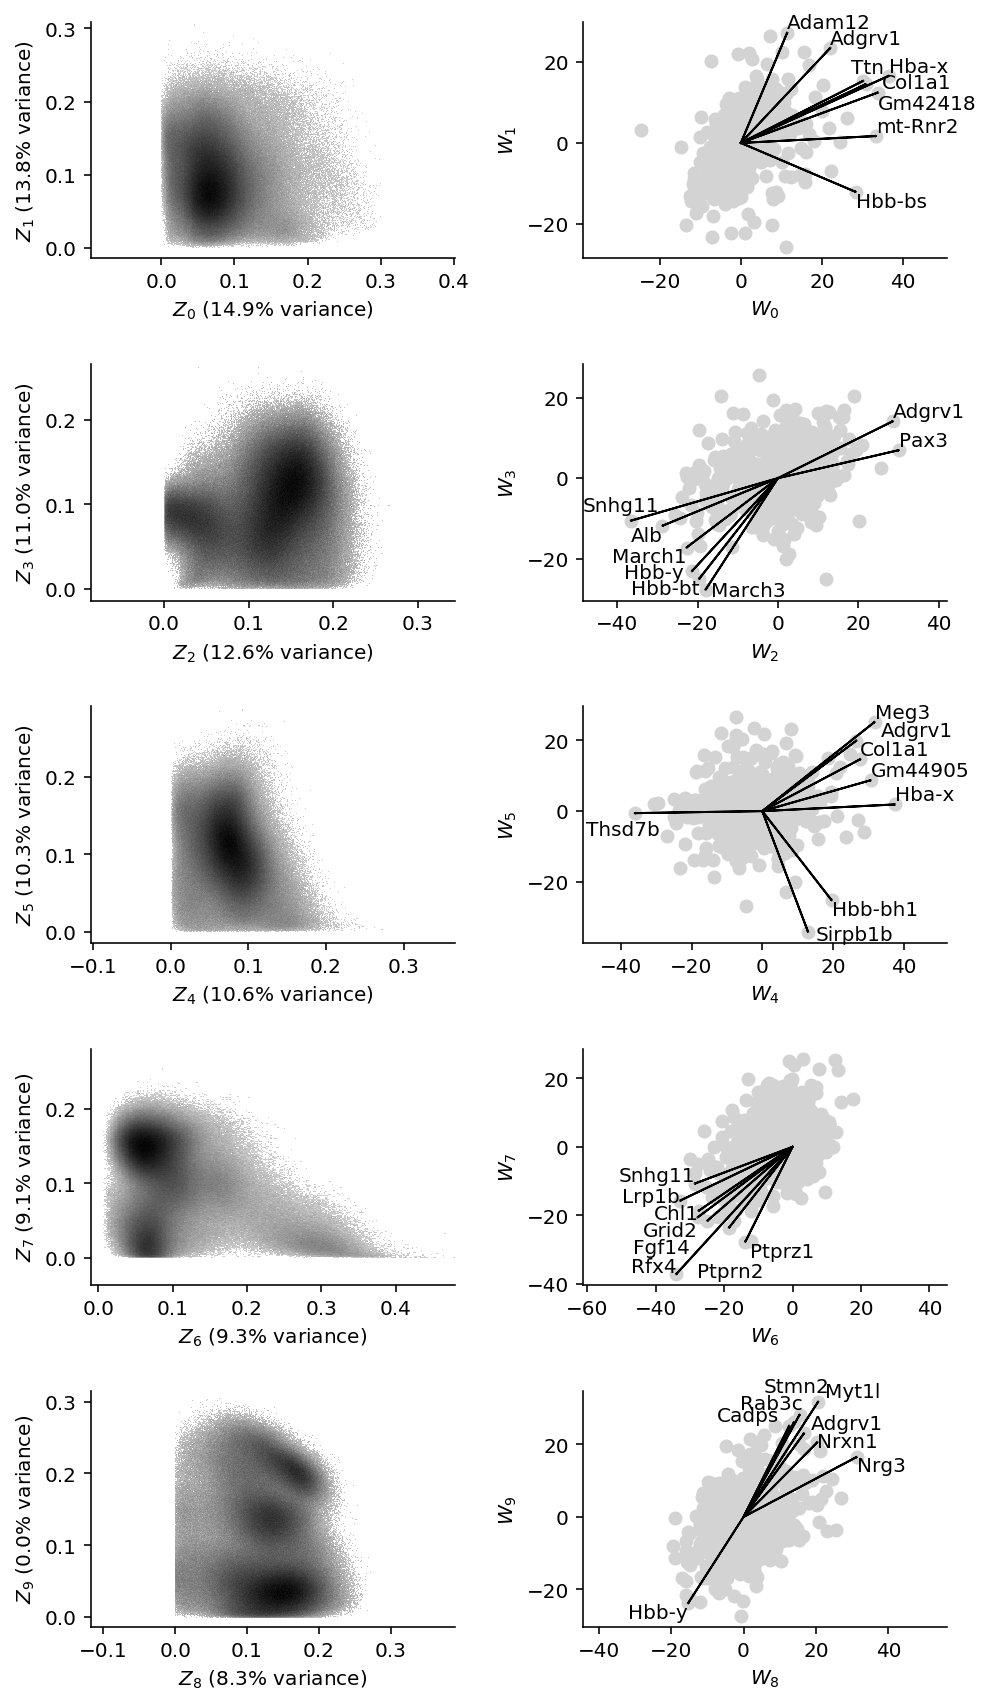

In [112]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df_ordered[f'z{2 * i}'], Z_df_ordered[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$Z_{2 * i}$ ({variance_explained[idx][2 * i]:.1%} variance)')
    plt.ylabel(f'$Z_{2 * i + 1}$ ({variance_explained[idx][2 * i + 1]:.1%} variance)')
    
    plt.xlim(left=-0.01)
    plt.ylim(bottom=-0.01)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df_ordered[w_columns[0]], W_df_ordered[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df_ordered.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(8)[['gene_short_name', 'lnth', *w_columns]]
    )
    print(ggg['gene_short_name'].values)
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_short_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_short_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_short_name, ha=ha, va=va))

#     plt.xlim(left=-3, right=3)
#     plt.ylim(bottom=-3, top=3)
        
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()

plt.savefig('figures/linear_cao_results_nonnegative.pdf', bbox_inches='tight', dpi=400)

In [110]:
hist_df = pd.read_csv('cao_full_training_hist.csv', index_col=0)

In [133]:
hist_df

,vae_ll_train_set,vae_ll_test_set,ldvae_ll_train_set,ldvae_ll_test_set
0,2703.818509,2702.028016,2679.306747,2677.942917
1,603.161839,603.074725,611.583232,611.419042
2,602.447401,602.374094,611.291368,611.121594
3,600.608416,600.548663,611.497087,611.327316


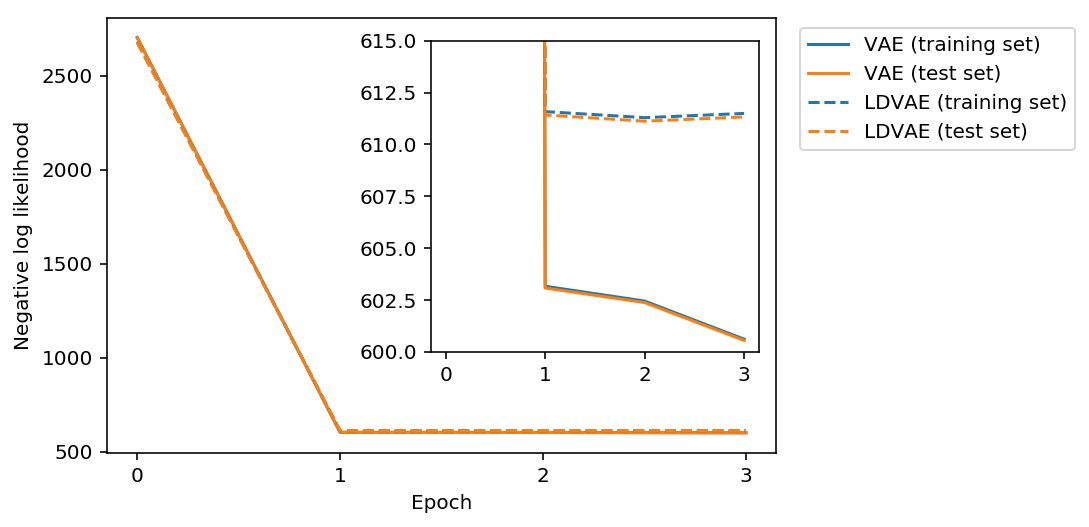

In [161]:
figsize(6, 4)

fig, ax1 = plt.subplots()

ax1.plot(hist_df['vae_ll_train_set'], c='C0', label='VAE (training set)')
ax1.plot(hist_df['vae_ll_test_set'], c='C1', label='VAE (test set)')
ax1.plot(hist_df['ldvae_ll_train_set'], c='C0', ls='--', label='LDVAE (training set)')
ax1.plot(hist_df['ldvae_ll_test_set'], c='C1', ls='--', label='LDVAE (test set)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Negative log likelihood')

plt.xticks([0, 1, 2, 3]);

ax2 = fig.add_axes([0.5, 0.3, 0.38, 0.54])

ax2.plot(hist_df['vae_ll_train_set'], c='C0', label=None)
ax2.plot(hist_df['vae_ll_test_set'], c='C1', label=None)
ax2.plot(hist_df['ldvae_ll_train_set'], c='C0', ls='--', label=None)
ax2.plot(hist_df['ldvae_ll_test_set'], c='C1', ls='--', label=None)

plt.ylim(bottom=600, top=615)
plt.xticks([0, 1, 2, 3]);

ax1.legend(bbox_to_anchor=(1.02, 1.), loc=2);

plt.savefig('figures/cao_full_training_comparison.pdf', bbox_inches='tight', dpi=200)